In [5]:
import math
import random
from matplotlib import pyplot as plt 
import numpy as np

In [70]:
# programme qui simule une v.a normale (c'est-à dire un echantillon d'observations de taille N)
def NormaleBM(N):
    Nd=int(math.floor(N/2)) # On simule les variables aléatoires par paire
    L=[]
    for i in range(Nd):
        U1=random.random()
        U2=random.random()
        Theta=2*math.pi*U1
        R=math.sqrt(-2*math.log(U2))
        X=R*math.cos(Theta)
        Y=R*math.sin(Theta)
        L.append(X)
        L.append(Y)
    
    # Dans le cas où N est impaire, on simule une derniere va normale
    if N%2==1 :  
        U1=random.random()
        U2=random.random()
        Theta=2*math.pi*U1
        R=math.sqrt(-2*math.log(U2))
        X=R*math.cos(Theta)
        L.append(X)
    
    return L

# programme qui simule une observation d'une v.a normale par application du TCL sur des v.a. uniforme
def ObsNormaleTCL(n):
    G=0
    for i in range(n):
        G+=random.random()
    return (G-n/2)/math.sqrt(n/12)

# programme qui simule une v.a normale (c'est-à dire un échantillon d'observations de taille N)
def NormaleTCL(N,n):
    G=[]
    for i in range(N):
        G.append(ObsNormaleTCL(n))
    return G

# TP 5 Monte Carlo

On a 
$$
\begin{array}{ccll}
\int_{-\infty}^{+\infty} e^{\beta x} \frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}} dx&=&
        \int_{-\infty}^{+\infty} e^{\beta x} f_X(x)dx & \textrm{avec $f_X$ la densité gaussienne (centrée réduite)}\\
&=&\mathbb{E}[e^{\beta X}] & \textrm{où $X$ est une variable gaussienne (centrée réduite)}\\
\end{array}
$$

In [78]:
def IntegraleI(n):
    beta=2
    Norm=NormaleBM(n)
    G=[math.exp(beta*k) for k in Norm]
    S=sum(G)/n
    return(S)

In [79]:
IntegraleI(100000)

7.259076758745722

In [80]:
def Convergence(N):
    Valeurs=[]
    for i in range(1,N):
        Valeurs.append(IntegraleI(i))
    k=range(1,N)
    plt.ylim(0,20)
    plt.plot(k,Valeurs)
    

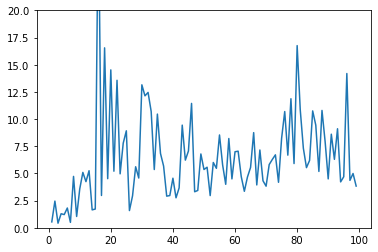

In [81]:
Convergence(100)

In [40]:
def Convergence(N,p):
    Valeurs=[]
    for i in range(1,N):
        Valeurs.append(IntegraleI(i*p))
    k=np.array(range(1,N))*p
    k=list(k)
    plt.ylim(0,10)
    plt.plot(k,Valeurs)

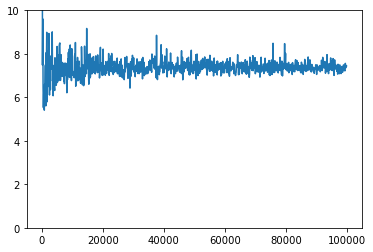

In [42]:
Convergence(1000,100)

In [47]:
def IntegraleConv(n):
    beta=2
    Norm=NormaleBM(n)
    Valeurs=[]
    S=0
    for k in range(1,n):
        S=S+math.exp(beta*Norm[k-1])
        Valeurs.append(S/k)
    plt.ylim(0,10)
    plt.plot(Valeurs)

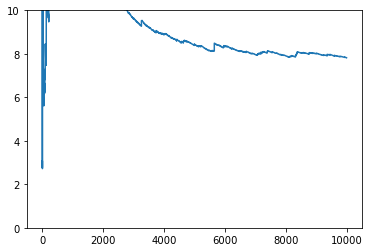

In [48]:
IntegraleConv(10000)

## Calcul Intégrales II

On a 
$$
\begin{array}{ccll}
\int_{-\infty}^{+\infty} e^{-\beta x} \frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}} dx&=&
        \int_{-\infty}^{+\infty}\frac{e^{-\frac{x^2}{2}}}{\beta\sqrt{2\pi}} f_X(x)dx & \textrm{avec $f_X$ la densité exponentielle de paramètre $\beta$}\\
&=&\mathbb{E}\left[\frac{e^{-\frac{X^2}{2}}}{\beta\sqrt{2\pi}}\right] & \textrm{où $X$ est une variable exponentielle de paramètre $\beta$}\\
\end{array}
$$

In [59]:
# Simulation d'une observation d'une va exponentielle :
def expObs(lam):
    U=random.random()
    X=-math.log(1-U)/lam  # X=F^-1(U)
    return(X)

def exp(N,lam): #lam : paramètre de la loi exponentielle ; N:taille de l'échantillon
    E=[]
    for k in range(N):
        Obs=expObs(lam)
        E.append(Obs)           # on ajoute cette observation au vecteur
    return(E)

In [60]:
def IntegraleII(n):
    beta=2
    Exp=exp(n,beta)
    G=[math.exp(-k**2/2)/(beta*math.sqrt(2*math.pi)) for k in Exp]
    S=sum(G)/n
    return(S)

In [61]:
IntegraleII(100)

0.1683294064902018

In [63]:
def ConvergenceII(N):
    Valeurs=[]
    for i in range(1,N):
        Valeurs.append(IntegraleII(i))
    k=range(1,N)
    plt.plot(k,Valeurs)
    

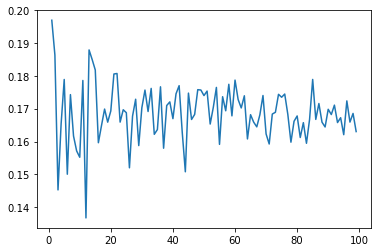

In [69]:
ConvergenceII(100)